<a href="https://colab.research.google.com/github/Jeen-Freecs/DS_Pet_Projects/blob/main/Numerical%20Algorithms/Ordinary_differential_equations_Boundary_value_problems.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Project: Ordinary differential equations: Boundary-value problems

Consider ordinary differential equation (ODE):

$$ \frac{d^2\!y}{dt^2}+4y=0$$
with boundary conditions $y(0)=1$ and $y(\frac{\pi}{4})=5$.

**Abstract**

The main aim of this research is to obtain the numerical solution of the 2nd order ODE ,which is shown above, by using the Shooting and Finite-Difference methods.The problem which is given is considered to be the Boundary - Value proble. We will approximate the numerical solution of this ODE by each method and then evaluate the performance of each method.We have conducted the analytical soultion of this ODE and we will use it for obtaining the Root Mean Squarred Error (RMSE).This RMSE is then will be used for plotting the graph perforance for Each method in terms of computational efficiency.This research concludes that Shooting method has the better computational efficiency than Finite-Difference method for the giben problem.

**Introduction**

We were given the 2nd order ODE with a set of additional constraints which is also identified as boundary conditions.

The main idea behind the Shooting method is transformation the ODE from boundary problem to initial-value problem and then to apply methods such as Euler or Runge-Kutta for finding the numerical soluiton.In this assignment we have used the RK(45) method.However to succesfully transform to initial-value problem we need to guess the $y'(a)$ as the boundary value of a problem and then find the numerical solution, based on this guessed initial condition. Basicly, what we need is the following eqution, which should be equal to 0.$$(approx)y_b - (given)y_b = 0$$

Here, we can use the root finding methods to find the appropriate initial condition that will give the numerical solution at maximum accuracy.
So, it can be said that the whole method consist of two parts, which are root-finding method and numerical integration method.As we have used the Runge-Kutta method, we have decided to use System of equations method, where we will perceive 2nd order ODE as two 1st-order ODEs.

In the case of Finite-Difference method, we calculate the numerical solution at each equidistant point by finite difference formulas.By this way we approximate the numerical solution of the whole ODE.The transformation we can see here is from differentila equatio into a system of algebraic equation.

We will use the central - difference methods in order to transorm our ODE to Finitte-Difference Equation.

$$y_0=1$$
$$y_{i−1}+(−2+4h^2)y_i+y_{i+1} = 0,  for->i=1,2,...,n−1$$
$$y_{100}=5$$

This Finitte-Difference Equation can defined as the matrix of the form AY = P, where y will be our discrete numerical solution.

We will write algorithm for each method to find the numerical solution as specified accuracy and also to generate the RMSE data with the runtime data to analyze the computational performance.


**Methods**

First of all, we have found the analytical solution for further use to find the RMSE and plotting the analytical graphs.F

In the shooting method, we have used two python functions in combination.These functions are **scipy.integrate.solve_ivp** and **scipy.optimize.fsolve** for finding the numerical integration and the appropriate inital codition, respectively.The first problem that arised is the order of differential equation, so we have to transform the ODE to a system of 1st order ODEs.This was done through numpy library.

In the Finite-Difference method, we have simply used numpy library for generating the data in the form of tridiagonal matrix A and right-hand side matrix P.The matrices was generated by the given formulas in the introduction.
To find the numerical solution we have used **np.linalg.solve** function which is specialized for solving System of linear algebraic equations.

At the end of each method, you can see the RMSE and stepsize at which the accuracy was achieved.Mostly in this research problem the graphs was plotted to conduct an analysis for each methods.I have used the plots for each method to see how the approximated solution alligned with the analytical one and this was done to make sure that our algorithm works.

In the end we have plotted the performance graph where data for errors of each method was genereated by append method and data for runtime was generated by **%%timeit** function.




**Main Body**


In [ ]:
#Importing libraries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import math as math
plt.style.use('ggplot')

**1)Provide an analytic solution to this ODE.**

We were required to find the analytical solution of the given ODE:

$$y(t) = cos(2t)+5sin(2t)$$

The data point for the analytical solution was generated through list comprehension.

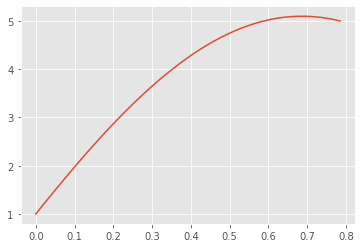

In [ ]:
t_exact_data = np.linspace(0,math.pi/4 , 100)
y_exact_data = [math.cos(2*i) + 5*math.sin(2*i) for i in t_exact_data]
plt.plot(t_exact_data, y_exact_data, '-')
plt.show()

**2) Write your Python code to find the solution of this ODE in the interval from $t=0$ to $t=\frac{\pi}{4}$ with $0.01\%$ accuracy using the shooting method.**

As it is the 2nd order ordinary differential equation(ODE) we will use the system of equations method and will separate the 2nd-order ODE to  two 1st-order ODEs:

$$ \frac{d^2\!y}{dt^2}+4y=0$$
$$ \frac{d^2\!y}{dt^2}= -4y$$
$$1) \frac{dy}{dt} = z$$
$$2) \frac{dz}{dt} = -4y$$
$$S(t) = \begin{bmatrix}
y(t) \\
z(t)
\end{bmatrix}$$
$$\frac{dS(t)}{dt} = \begin{bmatrix}
0 & 1 \\
0 & -4y/z
\end{bmatrix}$$

**In the code:**
s -> System of ODEs and y(t) -> s[0], while z(t) -> s[1].

*   s -> System of ODEs
*   y(t) -> s[0]
*   z(t) -> s[1]


In [ ]:
#importing necessary libraries and functions for the Shooting method
from scipy.integrate import solve_ivp
from scipy.optimize import fsolve

In [ ]:
a = 0
b = math.pi/4
func = lambda t, s: np.dot(np.array([[0,1],[0,-4*s[0]/s[1]]]),s)#system of ODES
y0 = 1 #initial condition for y(0) = 1

The approsimated value of y_b is equal to [10.00055349]
Root Mean Square Error: 0.0002127996979498746
The stepsize (Δt) that yields the required accuracy:0.007853981633974483


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


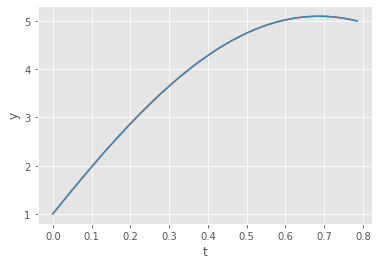

In [ ]:
#%%timeit -n 1 was used for generating the time data

N = 100
t_data = np.linspace(a,b,N)
h = (b-a)/N

y_true = [math.cos(2*i) + 5*math.sin(2*i) for i in t_data]

def objective(y_b):
    sol = solve_ivp(func, [a, b], [y0, y_b], t_eval = t_data)
    y = sol.y[0]
    return y[-1] - 5 #it will return the function which should be equal to zero,((approx y_b) - (gained) y_b = 0)

y_b = fsolve(objective, 1)
# "1" here is considered to be the intial guess
# "objective" will return the function t


print(f"The approsimated value of y_b is equal to {y_b}")
sol = solve_ivp(func, [a, b], [y0, y_b],rtol = 0.0001, t_eval = t_data)

MSE = np.square(np.subtract(sol.y[0],y_true)).mean() 
RMSE = math.sqrt(MSE)

#SH_errors.append(RMSE) was used for generating th error data

print(f"Root Mean Square Error: {RMSE}")
print(f"The stepsize (Δt) that yields the required accuracy:{h}")

plt.plot(sol.t, sol.y[0])
plt.plot(t_data, y_true, '-')
plt.xlabel('t')
plt.ylabel('y')
plt.show()

**3)Write your Python code to find the solution of this ODE in the interval from $t=0$ to $t=\frac{\pi}{4}$ with $0.01\%$ accuracy using the finite difference method.**

We will use the central - difference methods in order to transorm our ODE to Finitte-Difference Equation.

$$y_0=1$$
$$y_{i−1}+(−2+4h^2)y_i+y_{i+1} = 0,  for->i=1,2,...,n−1$$
$$y_{100}=5$$

These formulas were applied to create the matrices and find the numerical solution

Root Mean Square Error: 2.5101127749118378e-05
The stepsize (Δt) that yields the required accuracy:0.007933314781792407


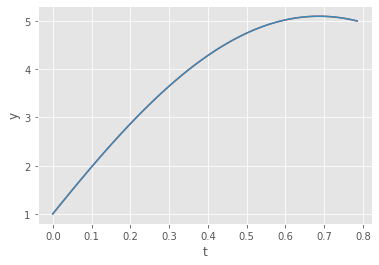

In [ ]:
#%%timeit -n 1
n = 99 #for finite method
h = (b-a) / n

N = 100 #for exact solutiion
t_data = np.linspace(a,b,N)
y_true = [math.cos(2*i) + 5*math.sin(2*i) for i in t_data]

#A matrix
A = np.zeros((n+1, n+1))
A[0, 0] = 1
A[n, n] = 1
for i in range(1, n):
  A[i, i-1] = 1      
  A[i, i] = -2+4*h**2
  A[i, i+1] = 1

#P matrix
p = np.zeros(n+1)
p[0] = 1
p[1:-1] = 0
p[-1] = 5


# solve the linear equations
y = np.linalg.solve(A, p)

t = np.linspace(a, b, N)

MSE = np.square(np.subtract(y,y_true)).mean() 
RMSE = math.sqrt(MSE)

#FD_errors.append(RMSE)

print(f"Root Mean Square Error: {RMSE}")
print(f"The stepsize (Δt) that yields the required accuracy:{h}")
plt.plot(t, y)
plt.plot(t_data, y_true, '-')
plt.xlabel('t')
plt.ylabel('y')
plt.show()

**4)Compare your numerical solutions with the analytical solution (visualize all the solutions, including the exact analytical solution, in one plot).**


Both methods allign almost perfecty with the exact solution.

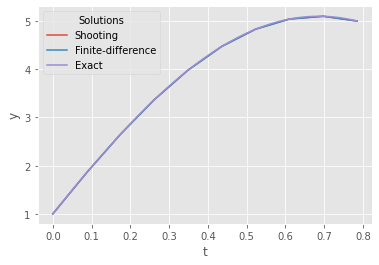

In [ ]:
plt.plot(t, y)
plt.plot(sol.t, sol.y[0])
plt.plot(t_exact_data, y_exact_data, '-')
plt.xlabel('t')
plt.ylabel('y')
plt.legend(['Shooting','Finite-difference', 'Exact'],title = 'Solutions', loc='best')
plt.show()

**5)Which method is a better option for solving this ODE considering their computational cost and precision?**

We have genereated the RMSE errors data and runtime data for each method.Each method generated the necessary data for n(#data points) = 5, 10, 15, 20, 25.

*Time is in seconds.


In [ ]:
SH_time = [0.191, 0.169, 0.173, 0.170, 0.163]
SH_errors = [0.00038499, 0.00039936, 0.00040648, 0.00041005, 0.0004122 ]

In [ ]:
FD_time = [0.184, 0.160, 0.175, 0.201, 0.203]
FD_errors = [0.01415859, 0.00290993, 0.00122115, 0.00066828, 0.00042086]

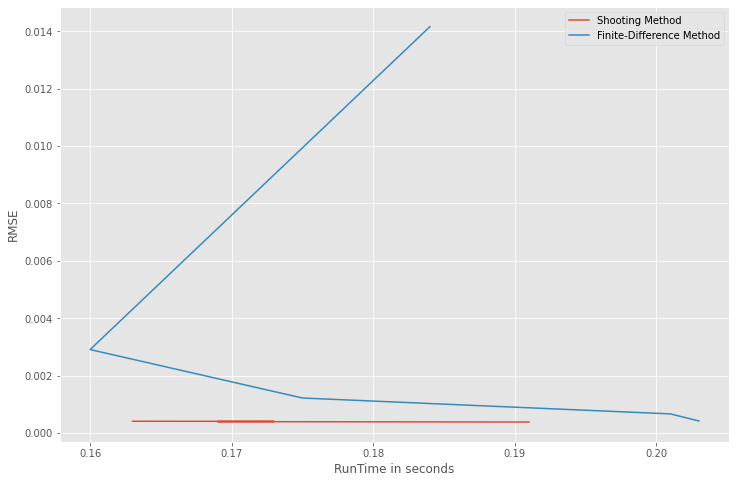

In [ ]:
plt.figure(figsize = (12,8))
plt.plot(SH_time, SH_errors)
plt.plot(FD_time,FD_errors)

plt.legend(['Shooting Method', 'Finite-Difference Method'], loc='best')
plt.xlabel('RunTime in seconds')
plt.ylabel('RMSE')
plt.show()

**Results**

In the graph above we can see two methods' behaviour in terms of RMSE and Runtime in seconds.It can be said that Finite-difference method has a linear correlation without an outlier (0.184s.) and the accuracy increases as runtime increases.**However the Shooting Method has done more efficient computations in terms of precision and computational cost**.In can be clearlys seen that there is significant difference between RMSE at the same points at Runtime axis.Only at the end two methods has almost the same precison, but there is difference between runtime, where Shooting method has more efficient result.

**Conclusion**

This research has given the performance results of each method at estimating the numerucal solution of the give ODE.We analyzed each method, and concluded that Shooting method is the efficient method in terms of computational cost and time complexity. This research is important for maximizing the efficiency in conducting the computational processes in any scientific field. Integrating the most productive method in terms of efficient memory usage and truncation error is the one of the main part of conducting data related research and should be done thoroughly.This research can be used by others to investigate the ODE boundary-value problems.